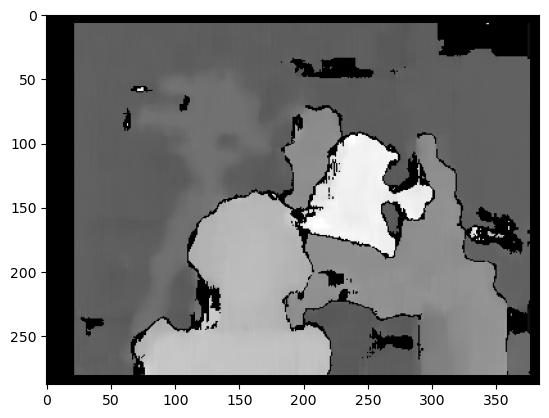

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
imgL = cv.imread('tsukuba_l.png', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('tsukuba_r.png', cv.IMREAD_GRAYSCALE)
 
stereo = cv.StereoBM.create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

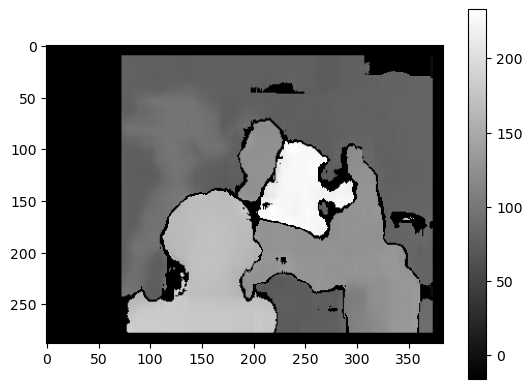

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load stereo images
imgL = cv.imread('tsukuba_l.png', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('tsukuba_r.png', cv.IMREAD_GRAYSCALE)

# Experimenting with numDisparities and blockSize
numDisparities = 64  # Must be a multiple of 16, try increasing this to capture more disparity levels
blockSize = 21  # Try larger values for smoother results, but it should be odd and greater than 5

# Create StereoBM object and compute disparity map
stereo = cv.StereoBM.create(numDisparities=numDisparities, blockSize=blockSize)
disparity = stereo.compute(imgL, imgR)

# Display the disparity map
plt.imshow(disparity, 'gray')
plt.colorbar()  # Add colorbar for better visualization of disparity
plt.show()


Distance between the two points: 100.00000000015616 meters


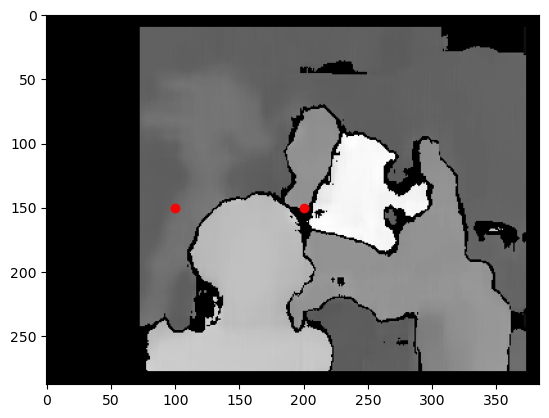

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load stereo images
imgL = cv.imread('tsukuba_l.png', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('tsukuba_r.png', cv.IMREAD_GRAYSCALE)

# Parameters: these need to be known from your stereo setup
focal_length = 0.8  # Focal length in pixels (this is an example, you need to use the actual value)
baseline = 0.06     # Baseline in meters (distance between the two camera centers)

# Compute the disparity map
numDisparities = 64
blockSize = 21
stereo = cv.StereoBM.create(numDisparities=numDisparities, blockSize=blockSize)
disparity = stereo.compute(imgL, imgR).astype(np.float32)

# Normalize the disparity map for visualization
disparity_normalized = (disparity - disparity.min()) / (disparity.max() - disparity.min())

# Select two points (you can choose any two points manually)
point1 = (100, 150)  # Example point1 coordinates (x1, y1)
point2 = (200, 150)  # Example point2 coordinates (x2, y2)

# Get the disparity values at the points
disparity_point1 = disparity[point1[1], point1[0]]
disparity_point2 = disparity[point2[1], point2[0]]

# Ensure that disparity is positive and valid
if disparity_point1 <= 0 or disparity_point2 <= 0:
    print("Invalid disparity value. The points may be out of range.")
else:
    # Compute depth (Z coordinate) for each point
    Z1 = (focal_length * baseline) / disparity_point1
    Z2 = (focal_length * baseline) / disparity_point2

    # Compute the Euclidean distance between the two points in 3D space
    # Assuming that (X, Y) in image space corresponds to real-world coordinates proportional to Z
    distance = np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 + (Z1 - Z2)**2)

    print(f"Distance between the two points: {distance} meters")

# Display disparity map for visualization
plt.imshow(disparity_normalized, 'gray')
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color='red')
plt.show()
